In [1]:
from texto.texto import Texto
from sklearn.decomposition import TruncatedSVD
from numpy.linalg import norm as np_norm
from scipy.sparse.linalg import norm as sp_norm
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame, Series
from wordcloud import WordCloud
import pandas as pd
from time import time

### 1. Dom Casmurro

In [2]:
txt = Texto('data/dom_casmurro.txt', stop_words=None)

In [3]:
# Matriz que vou usar no SVD
doc_term_matrix = txt.ocorrencias
doc_term_matrix

<49x387 sparse matrix of type '<class 'numpy.int64'>'
	with 641 stored elements in Compressed Sparse Row format>

<p style="color:red"> Por que aceita no maximo 49 pinceis em vez de 387? </p>
<p style="color:red"> Eu deveria transpor a matriz? Ai seria uma matriz termo-documento de fato.</p>

In [4]:
# Instancia do SVD com n componentes (n "pinceis")
svd = TruncatedSVD(n_components=2)

In [5]:
# Matriz Documento X "Alguma Coisa" (Matriz dos "Pinceis")
reduced_matrix = svd.fit_transform(doc_term_matrix)
reduced_matrix.shape

(49, 2)

In [6]:
# Matriz "Alguma Coisa" X Termos (Matriz das "Pinceladas")
svd.components_.shape

(2, 387)

In [7]:
reconstructed = reduced_matrix @ svd.components_
reconstructed.shape

(49, 387)

In [8]:
print(f"Norma original: {sp_norm(doc_term_matrix)}")
print(f"Norma apos compressao: {np_norm(reconstructed)}")

Norma original: 28.053520278211074
Norma apos compressao: 13.900768729548544


#### Comparando o erro de cada número de componentes

Text(0.5, 0.98, 'Escalar Linear')

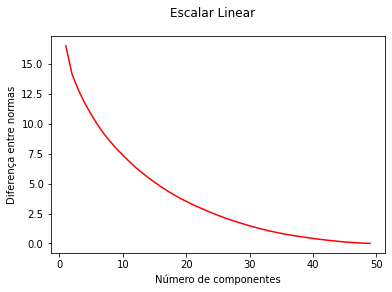

In [9]:
# Numero maximo de "pinceis"
max_cols = doc_term_matrix.shape[0]
max_range = range(1,max_cols+1)

# Norma da matriz original
orig_norm = sp_norm(doc_term_matrix)

diffs = []

for i in max_range:
    svd = TruncatedSVD(n_components=i)
    reduced_matrix = svd.fit_transform(doc_term_matrix)
    reconstructed = reduced_matrix @ svd.components_
    diff = abs(np_norm(reconstructed) - orig_norm)
    diffs.append(diff)

plt.plot(max_range, diffs, 'r')
plt.ylabel('Diferença entre normas')
plt.xlabel('Número de componentes')
plt.suptitle('Escalar Linear')

Text(0.5, 0.98, 'Escala Logarítmica')

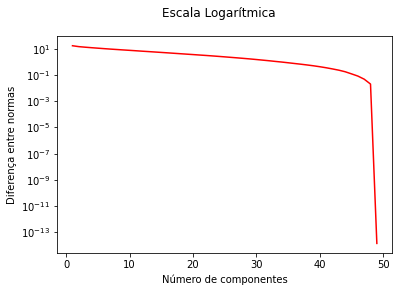

In [10]:
plt.plot(max_range, diffs, 'r')
plt.ylabel('Diferença entre normas')
plt.xlabel('Número de componentes')
plt.yscale('log')
plt.suptitle('Escala Logarítmica')

### 2. Inglês X Português

In [11]:
txt = Texto('data/assis_vs_wells.txt')

In [12]:
# Matriz que vou usar no SVD
doc_term_matrix = txt.ocorrencias
doc_term_matrix

<98x682 sparse matrix of type '<class 'numpy.int64'>'
	with 1174 stored elements in Compressed Sparse Row format>

In [13]:
# Instancia do SVD com n componentes (n "pinceis")
svd = TruncatedSVD(n_components=2)

In [14]:
# Matriz Documento X "Alguma Coisa" (Matriz dos "Pinceis")
reduced_matrix = svd.fit_transform(doc_term_matrix)
reduced_matrix.shape

(98, 2)

In [15]:
# Matriz "Alguma Coisa" X Termos (Matriz das "Pinceladas")
svd.components_.shape

(2, 682)

#### Mostrar as palavras de cada grupo

In [16]:
# Coluna 1 dos pinceis
pincel1 = reduced_matrix[:,0]

# Linha 1 das pinceladas
pinceladas1 = svd.components_[0]

# Reconstruir parte da matriz original
matriz1 = np.outer(pincel1, pinceladas1)
matriz1.shape

(98, 682)

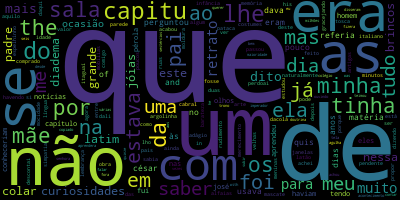

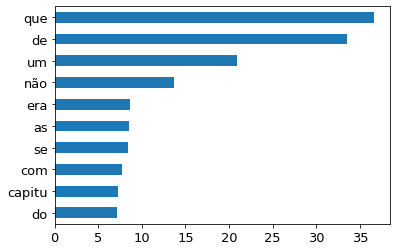

In [17]:
freq = Series(matriz1.sum(axis=0), index=txt.palavras_distintas)
freq.sort_values()[-10:].plot.barh(fontsize=13)
WordCloud().generate_from_frequencies(frequencies=freq[freq > 0]).to_image()

In [18]:
# Coluna 2 dos pinceis
pincel2 = reduced_matrix[:,1]

# Linha 2 das pinceladas
pinceladas2 = svd.components_[1]

# Reconstruir parte da matriz original
matriz2 = np.outer(pincel2, pinceladas2)
matriz2.shape

(98, 682)

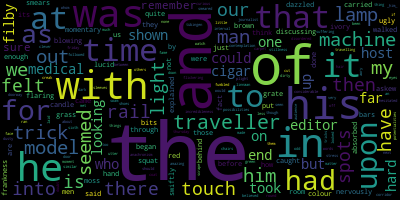

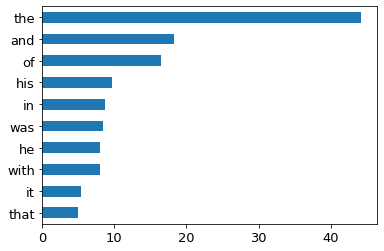

In [19]:
freq = Series(matriz2.sum(axis=0), index=txt.palavras_distintas)
freq.sort_values()[-10:].plot.barh(fontsize=13)
WordCloud().generate_from_frequencies(frequencies=freq[freq > 0]).to_image()

### 2. TripAdvisor

In [22]:
df = pd.read_csv("data/reviews.csv")

In [23]:
reviews = list(df['Review'])

In [25]:
rtxt = Texto(reviews, arquivo=False, stop_words='english')

In [26]:
rmatrix = rtxt.ocorrencias
rmatrix

<20491x52650 sparse matrix of type '<class 'numpy.int64'>'
	with 1655261 stored elements in Compressed Sparse Row format>

In [28]:
svd = TruncatedSVD(n_components=2)
reduced_matrix = svd.fit_transform(rmatrix)
reduced_matrix.shape

(20491, 2)

In [29]:
svd.components_.shape

(2, 52650)

#### Mostrar as palavras de cada grupo

In [30]:
pincel1 = reduced_matrix[:,0]

pinceladas1 = svd.components_[0]

matrixA = np.outer(pincel1, pinceladas1)
matrixA.shape

(20491, 52650)

<AxesSubplot:>

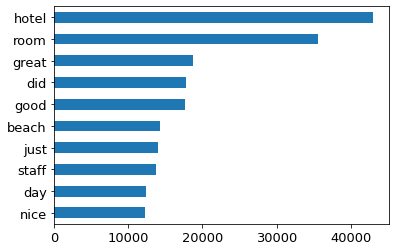

In [31]:
rfreq = Series(matrixA.sum(axis=0), index=rtxt.palavras_distintas)
rfreq.sort_values()[-10:].plot.barh(fontsize=13)
#WordCloud().generate_from_frequencies(frequencies=rfreq[rfreq > 0]).to_image()

In [32]:
# Coluna 2 dos pinceis
pincel2 = reduced_matrix[:,1]

# Linha 2 das pinceladas
pinceladas2 = svd.components_[1]

# Reconstruir parte da matriz original
matrixB = np.outer(pincel2, pinceladas2)
matrixB.shape

(20491, 52650)

78.33283996582031


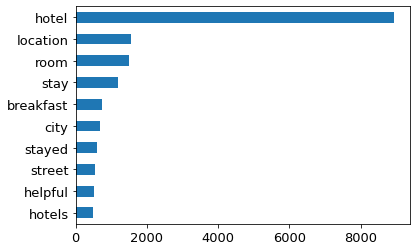

In [33]:
t0 = time()
rfreq2 = Series(matrixB.sum(axis=0), index=rtxt.palavras_distintas)
rfreq2.sort_values()[-10:].plot.barh(fontsize=13)
#WordCloud().generate_from_frequencies(frequencies=rfreq2[rfreq2 > 0]).to_image()
print(time() - t0)